In [1]:
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import copy

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))   



PyTorch version: 2.3.0.dev20231230+rocm5.7
Torchvision version: 0.18.0.dev20231230+rocm5.7
CUDA is available: True


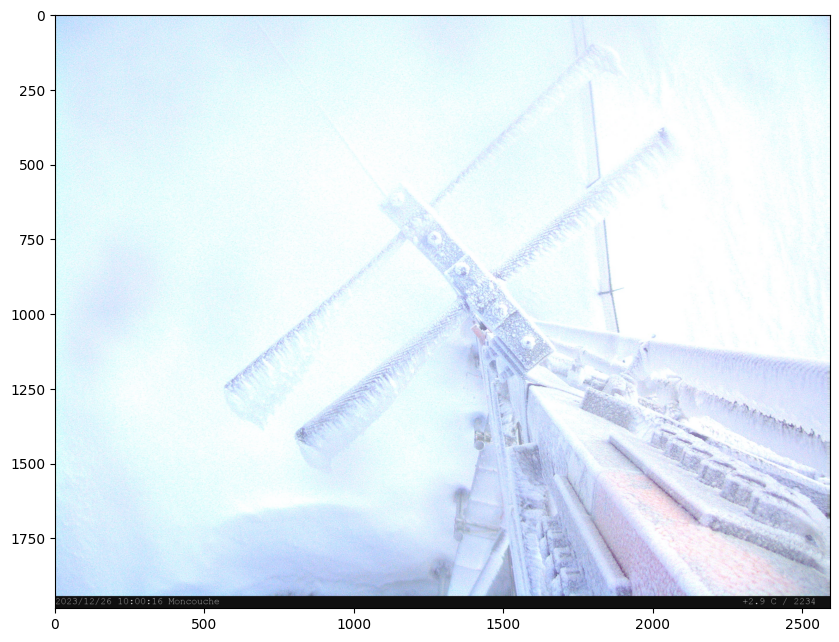

In [2]:
#image = cv2.imread('input.png')
#image = cv2.imread('images/Photo_Moncouche_HD_2024_02_29_08_00_20.jpg')
image = cv2.imread('images/Photo_Moncouche_HD_2023_12_26_10_00_24.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()

In [3]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "../sam_vit_h_4b8939.pth" # path to sam checkpoint
model_type = "vit_h" # type of the model

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

In [4]:
predictor.set_image(image)

In [8]:
#input_box = np.array([650, 1600, 2200, 800])
input_box = np.array([640, 800, 2200, 1600]) # [x1, y1, x2, y2]
input_box = np.array([720, 280, 2160, 1540]) # [x1, y1, x2, y2]
#input_box = np.array([520, 20, 2160, 1540]) # [x1, y1, x2, y2]

#input_point = np.array([[1430, 900]])
input_point = np.array([[1330, 800]])
input_label = np.array([1])


In [9]:
masks, _, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    box=input_box,
    multimask_output=False,
)



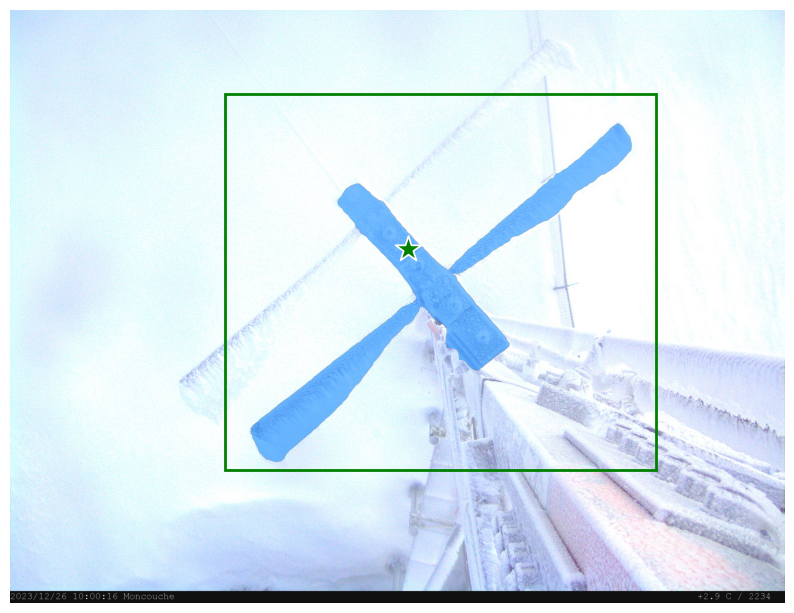

In [11]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
show_points(input_point, input_label,plt.gca())
plt.axis('off')
plt.show()

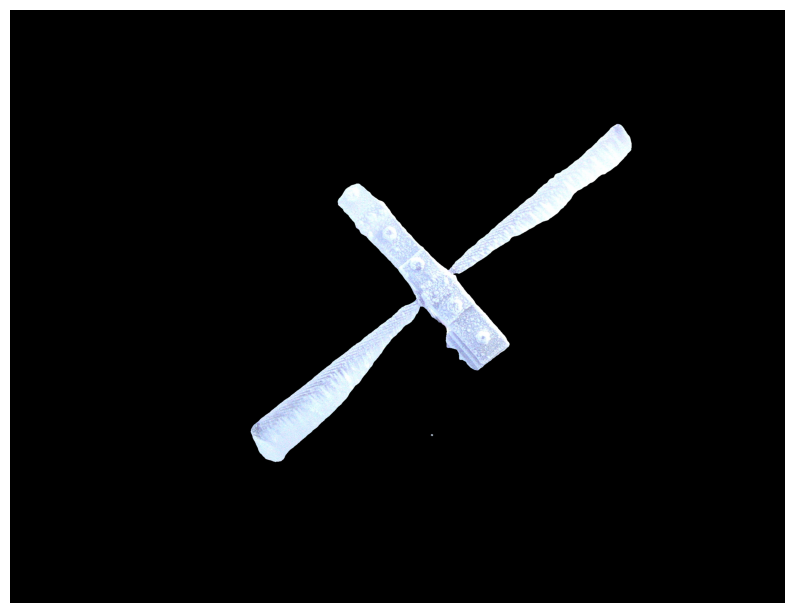

In [12]:
# Remove background by turn it to white
image_copy = copy.deepcopy(image)
image_copy[masks[0]==False] = [0,0,0] 
plt.figure(figsize=(10, 10))
plt.imshow(image_copy)
plt.axis('off')
plt.show()

In [13]:
cv2.imwrite("background.png", image_copy)

True

### Automation of the cropping

In [14]:
from SAM import *

PyTorch version: 2.3.0.dev20231230+rocm5.7
Torchvision version: 0.18.0.dev20231230+rocm5.7
CUDA is available: True


In [15]:
images_files = [f for f in listdir("../moncouche_HD/") if isfile(join("../moncouche_HD/", f))]
print(images_files)

['Photo_Moncouche_HD_2023_11_26_16_00_27.jpg', 'Photo_Moncouche_HD_2023_12_29_14_00_25.jpg', 'Photo_Moncouche_HD_2023_11_21_22_04_10.jpg', 'Photo_Moncouche_HD_2023_11_25_07_00_23.jpg', 'Photo_Moncouche_HD_2024_01_14_02_59_20.jpg', 'Photo_Moncouche_HD_2024_02_19_02_04_05.jpg', 'Photo_Moncouche_HD_2024_01_06_04_03_43.jpg', 'Photo_Moncouche_HD_2023_12_05_07_00_22.jpg', 'Photo_Moncouche_HD_2024_01_31_21_04_01.jpg', 'Photo_Moncouche_HD_2024_01_24_17_02_15.jpg', 'Photo_Moncouche_HD_2023_12_11_07_00_41.jpg', 'Photo_Moncouche_HD_2024_01_05_06_04_03.jpg', 'Photo_Moncouche_HD_2024_01_04_02_03_48.jpg', 'Photo_Moncouche_HD_2024_02_28_13_00_27.jpg', 'Photo_Moncouche_HD_2024_02_07_07_00_23.jpg', 'Photo_Moncouche_HD_2023_12_24_01_04_05.jpg', 'Photo_Moncouche_HD_2023_12_30_14_00_23.jpg', 'Photo_Moncouche_HD_2023_12_31_17_03_48.jpg', 'Photo_Moncouche_HD_2023_12_04_06_04_05.jpg', 'Photo_Moncouche_HD_2024_01_15_15_44_17.jpg', 'Photo_Moncouche_HD_2024_02_25_11_00_21.jpg', 'Photo_Moncouche_HD_2024_01_17_21

Some ideas for the accumulation approximation method.

i) count the numbers of pixels that aren't black.

ii) unsupervised image clustering

iii) image comparison with opencv (correlation factor ?)

iv) gray-scale

v) VGG16 Deep Learning Model

vi) Histogram-Based Approache (open-cv)

vii) Structural Similarity Index (SSIM) sk-image

viii) Siamese networks 

In [16]:
image_path = "../moncouche_HD/"
output_path = "../modv2_moncouche_HD/"
#input_box_moncouche = np.array([720, 280, 2160, 1540]) # [x1, y1, x2, y2]
#input_point = np.array([[1430, 900]])
#input_label = np.array([0])

input_box_moncouche = np.array([520, 20, 2160, 1540]) # [x1, y1, x2, y2]

input_box_moncouche = np.array([720, 280, 2160, 1540]) # [x1, y1, x2, y2]
input_point = np.array([[1330, 800]])
input_label = np.array([1])


remove_background_with_SAM(images_path=image_path, input_box= input_box_moncouche,input_point=input_point, input_label=input_label, output_path=output_path, grayscale=True)